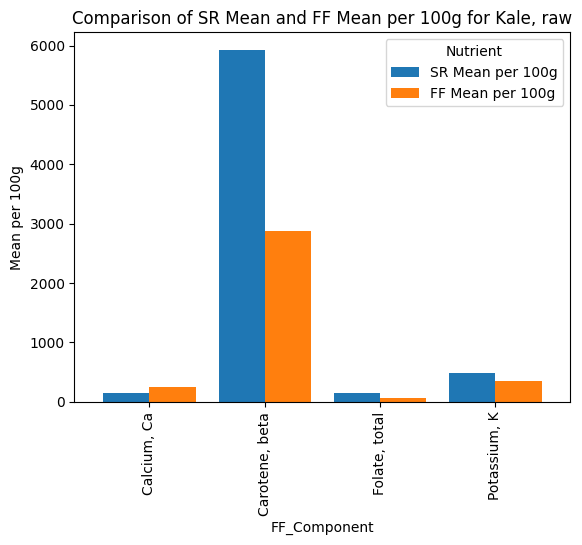

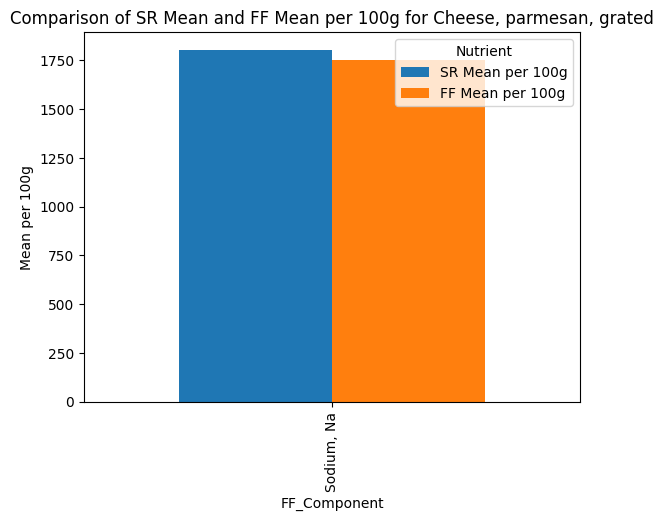

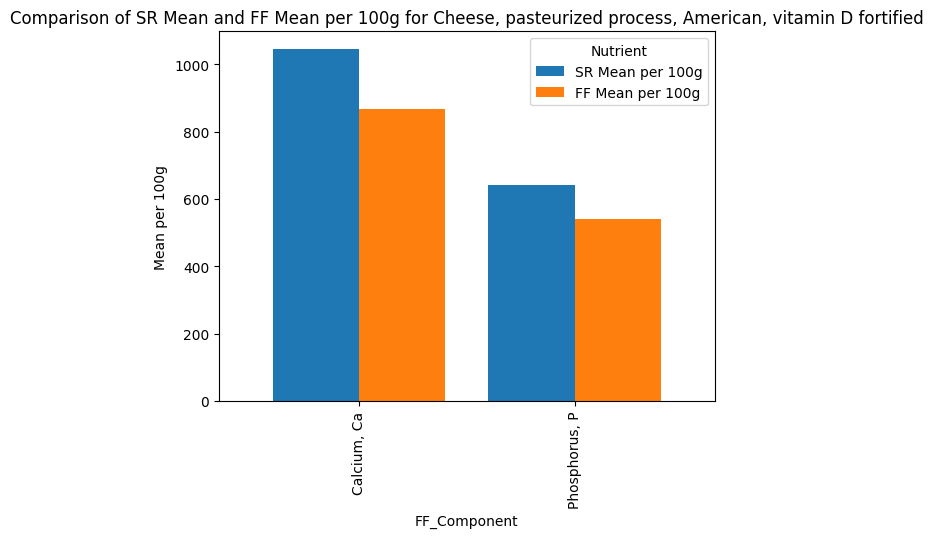

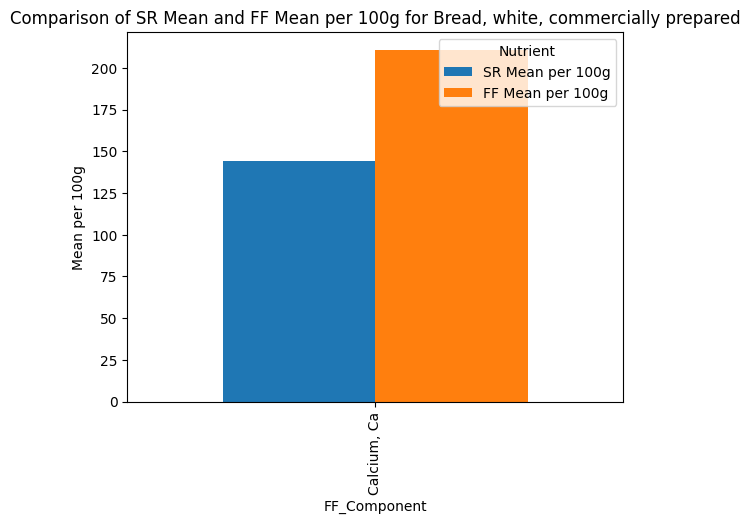

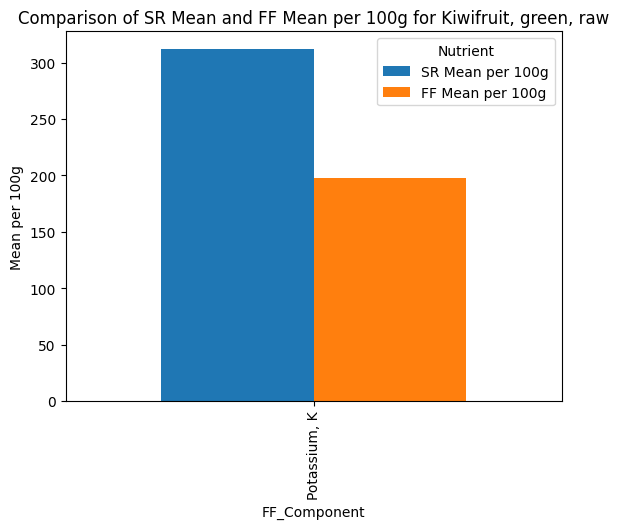

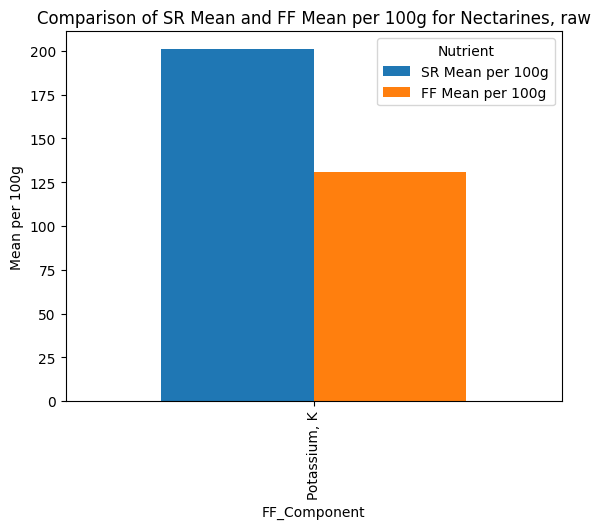

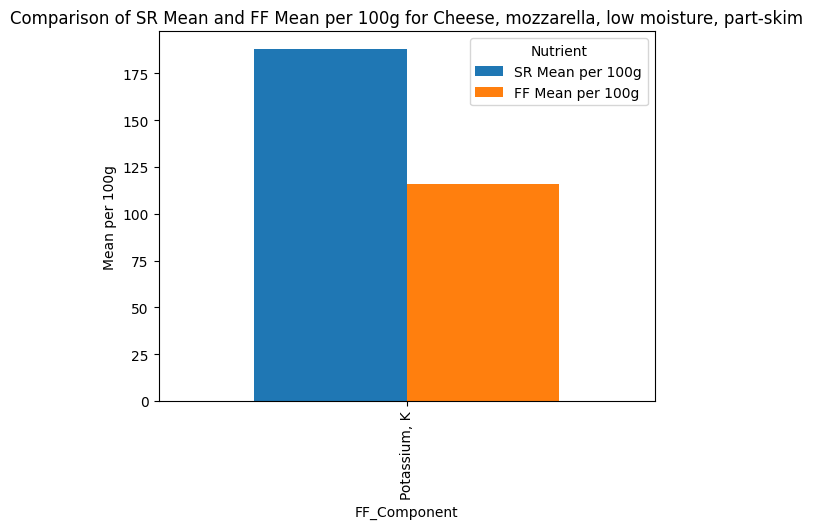

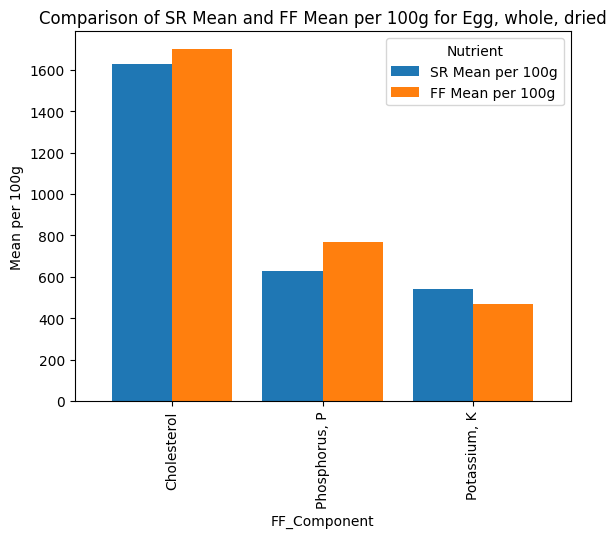

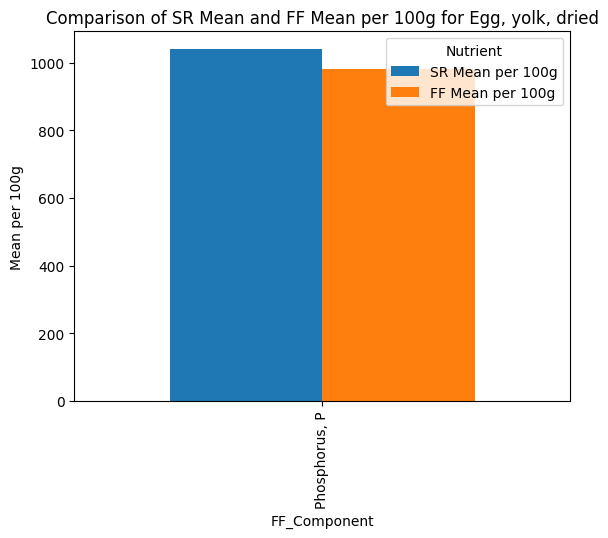

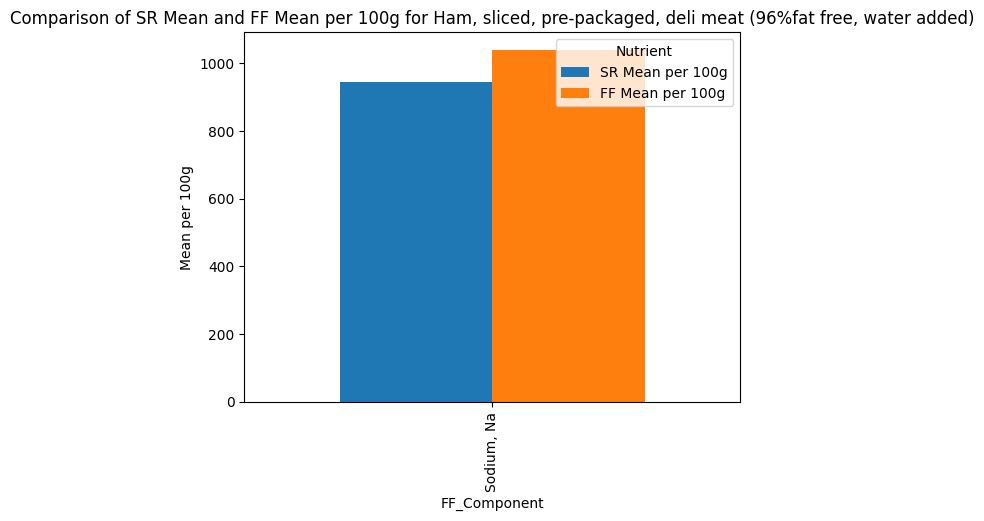

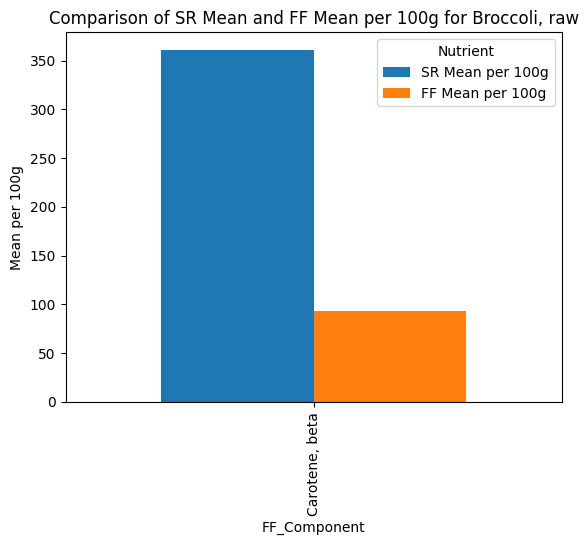

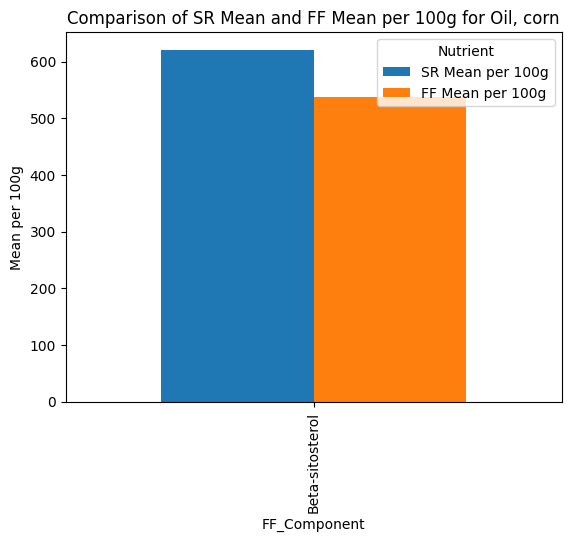

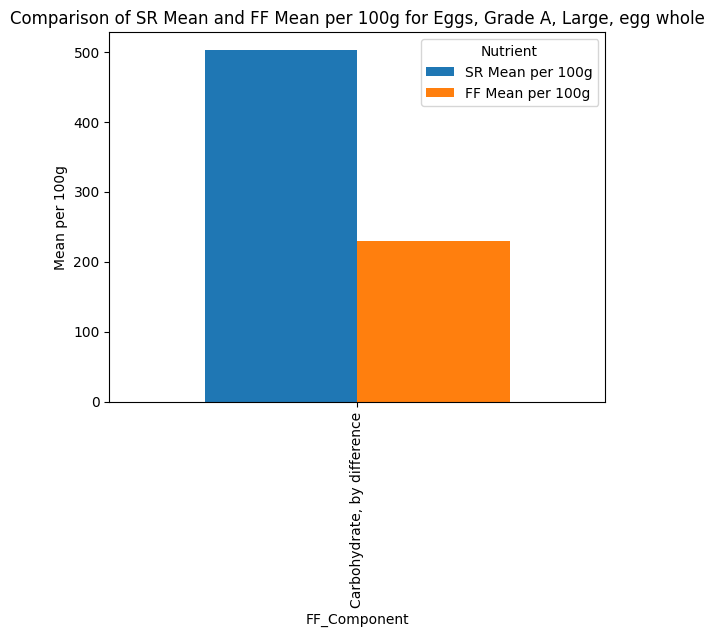

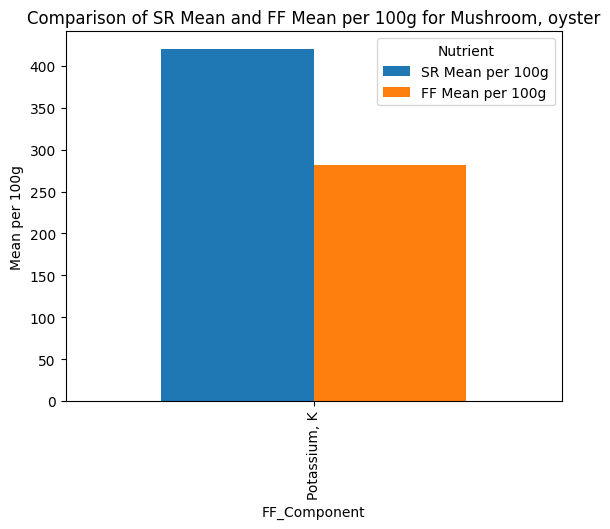

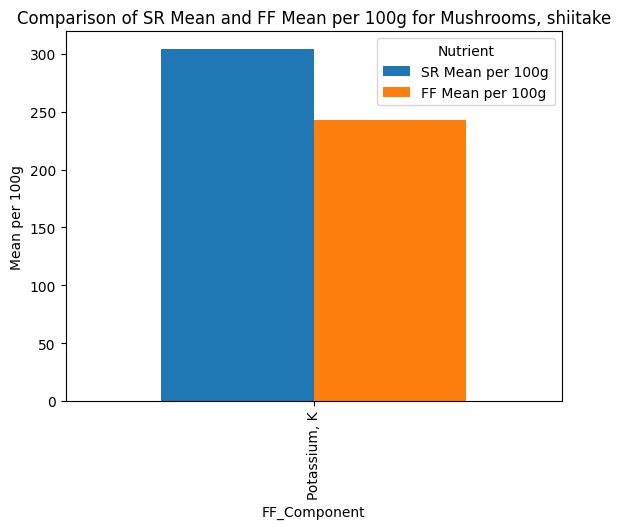

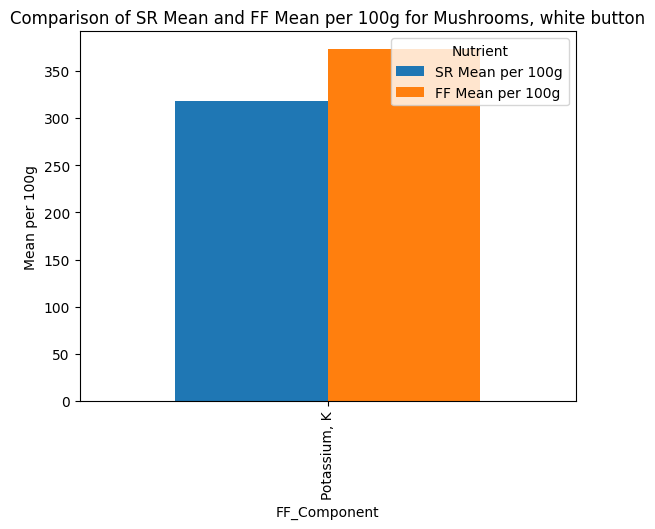

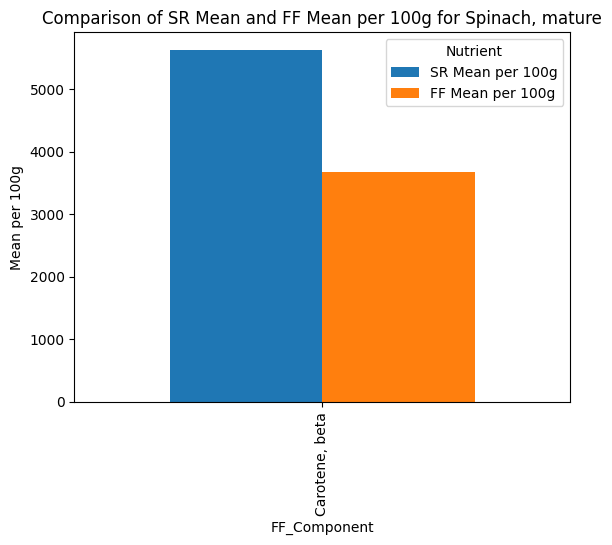

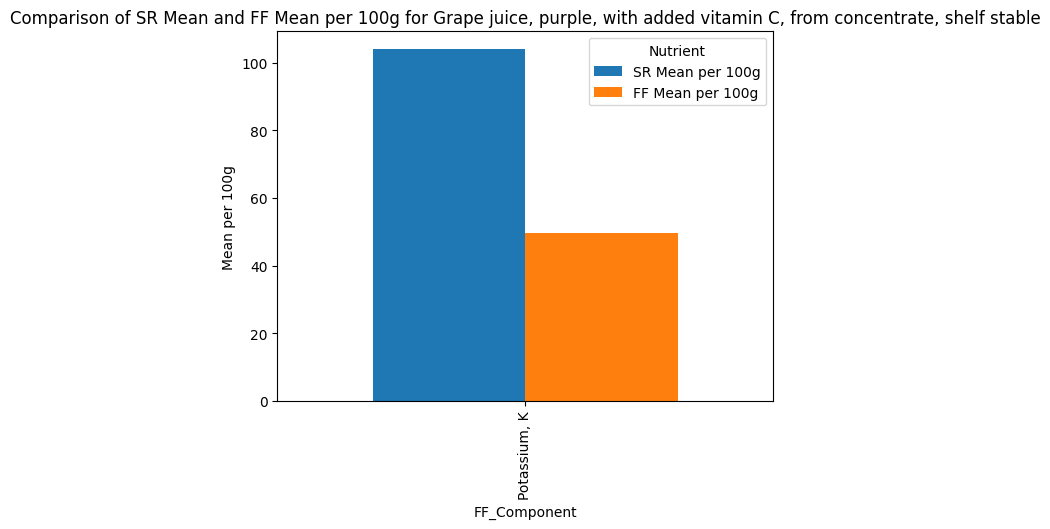

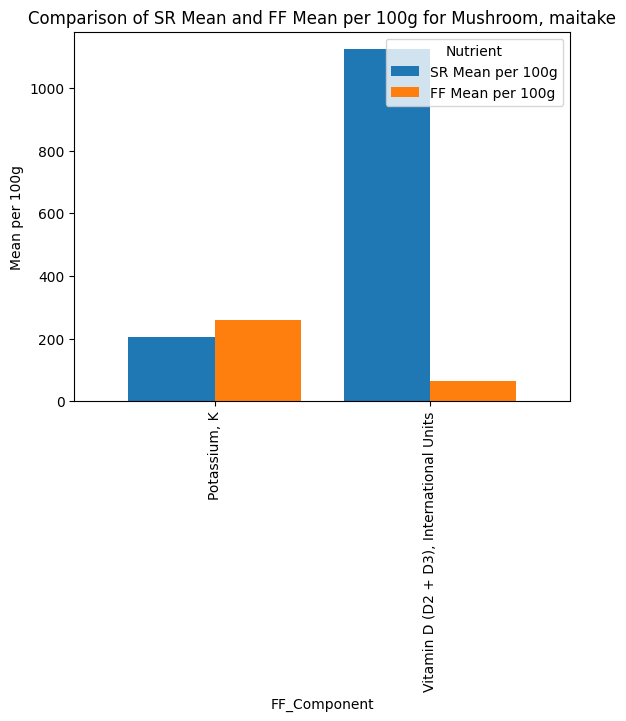

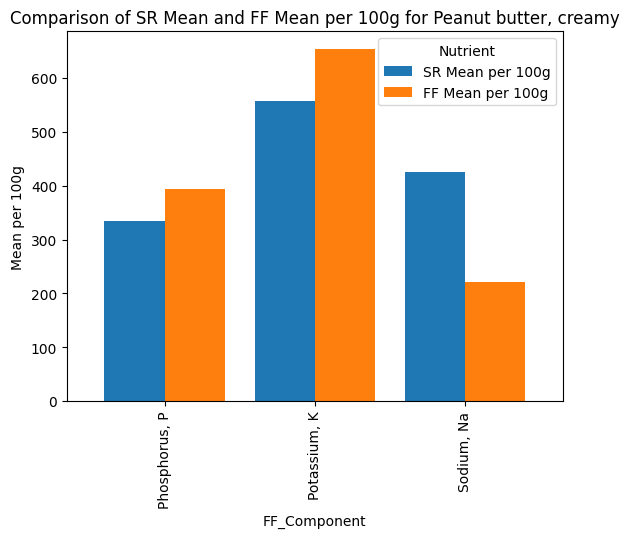

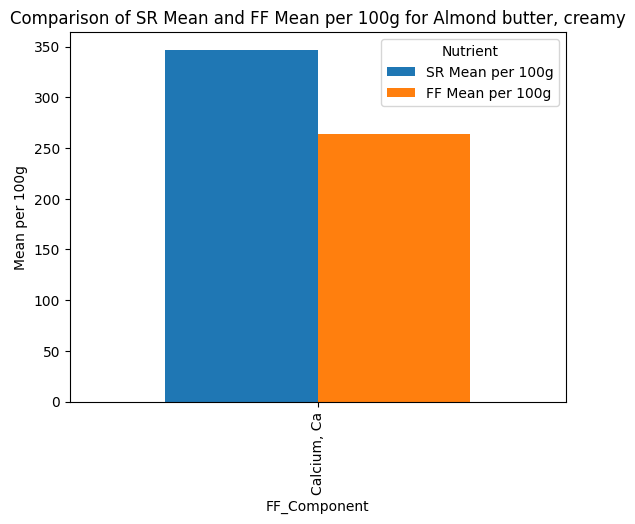

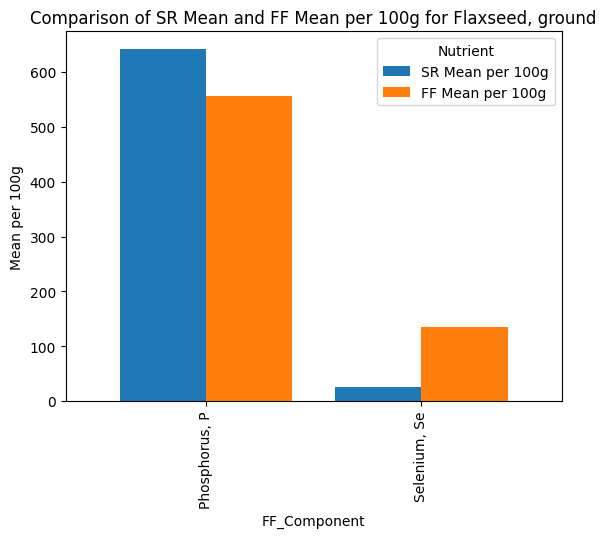

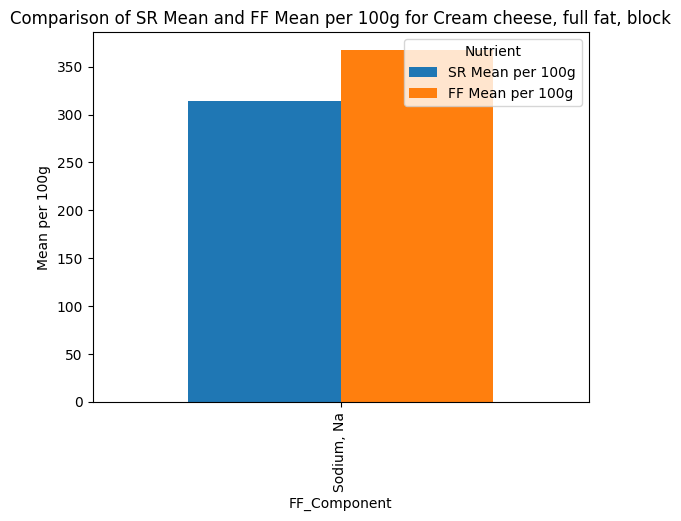

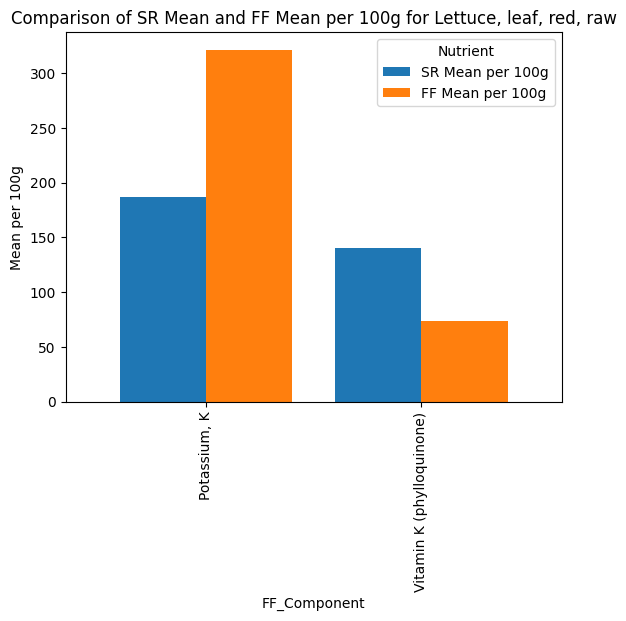

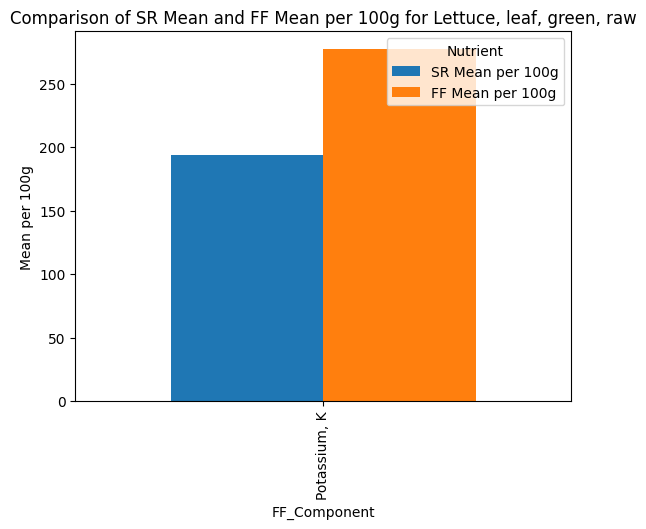

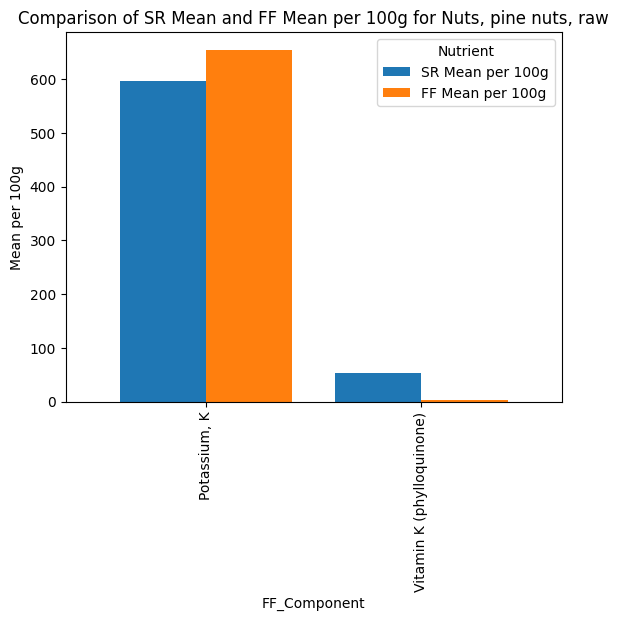

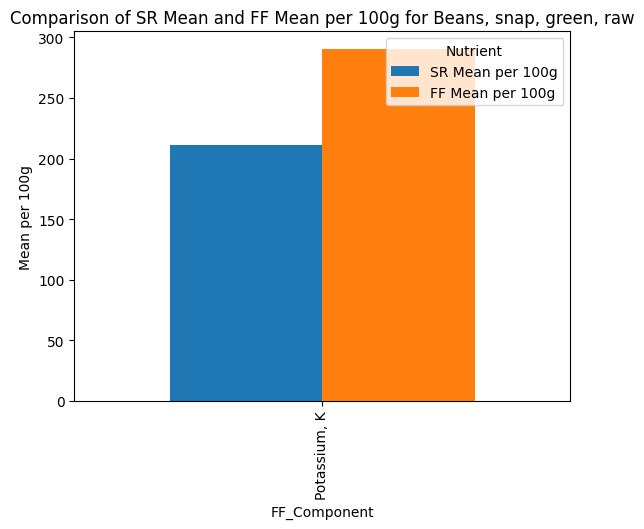

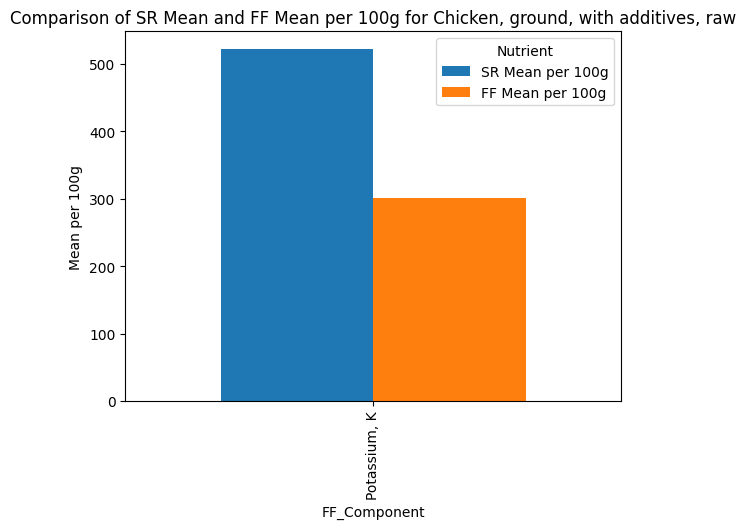

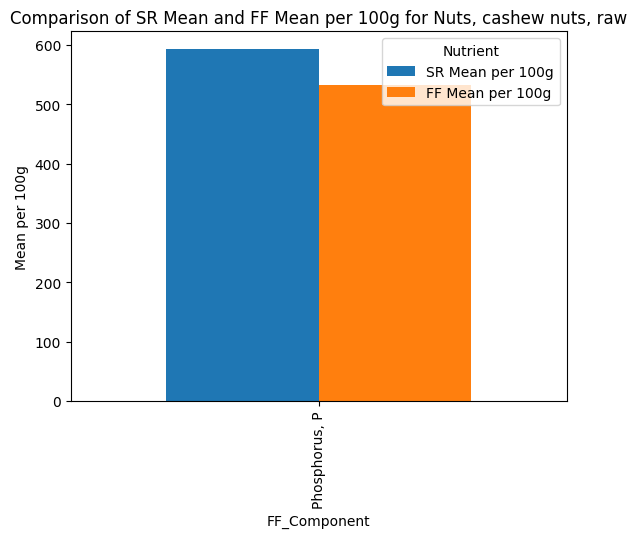

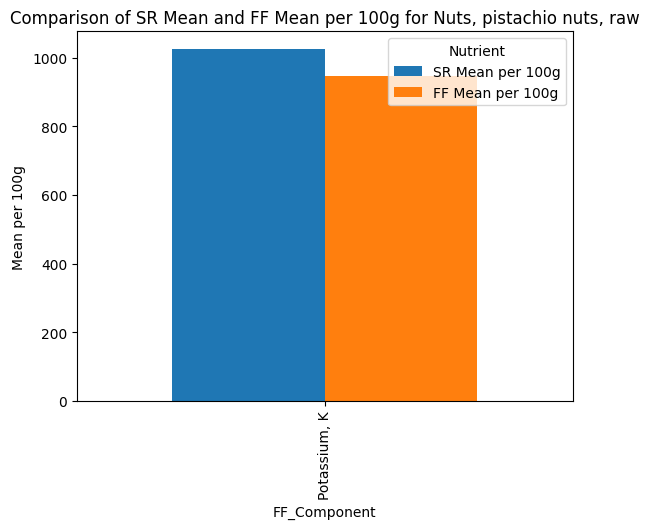

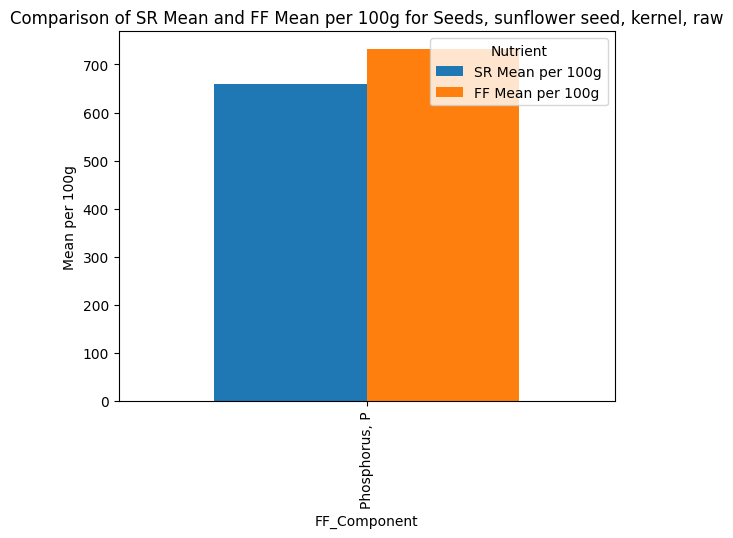

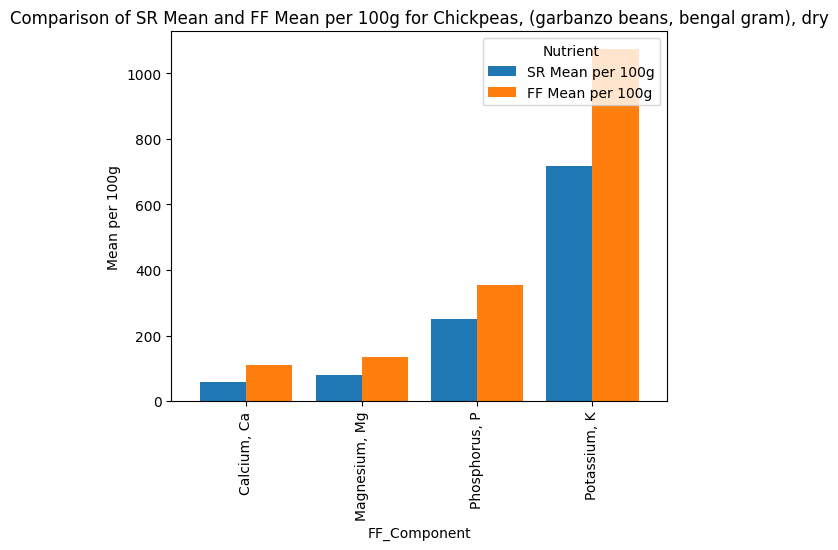

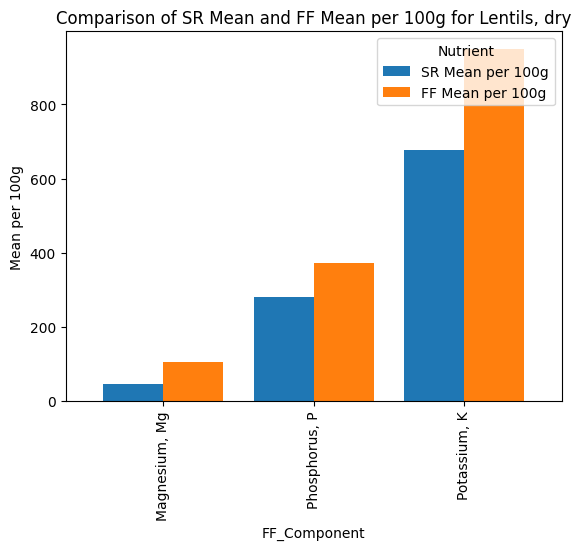

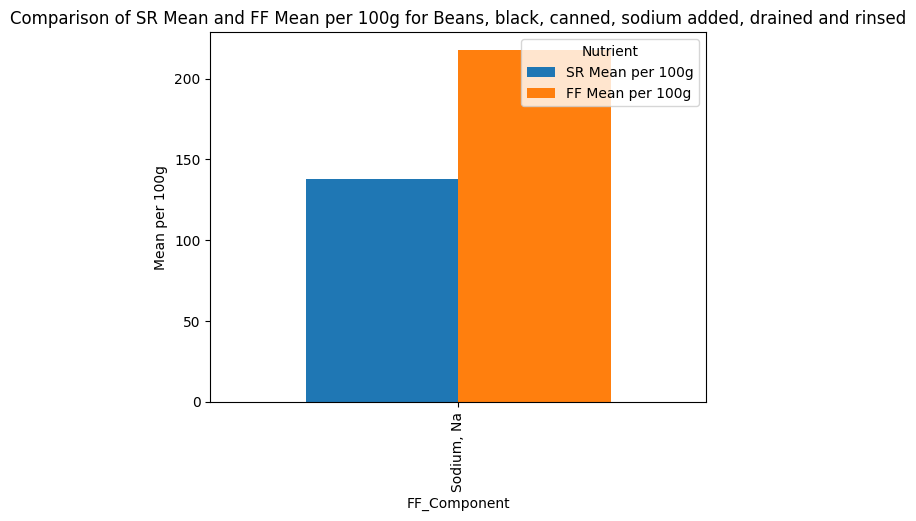

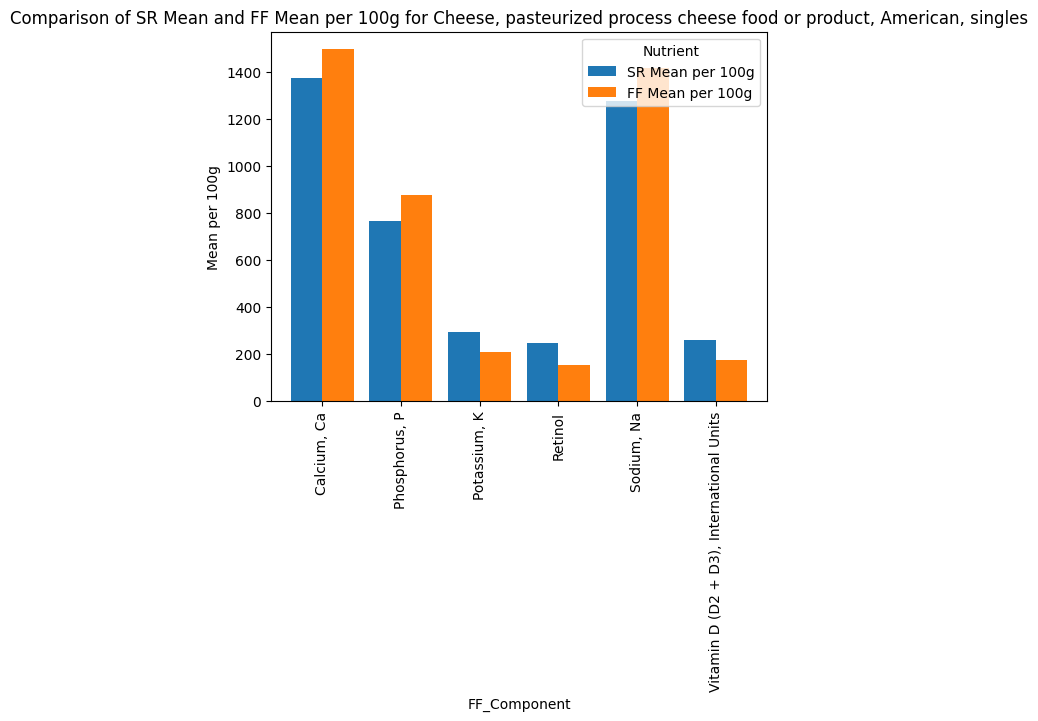

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Assuming your CSV file is named 'nutrition_data.csv'
file_path = 'CLEANED_by_Food.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Get unique FF Food Descriptions
food_descriptions = df['FF Food description'].unique()

# Loop through each unique food description
for food_description in food_descriptions:
    # Filter rows for the specific food description
    food_df = df[df['FF Food description'] == food_description]

    # Calculate the absolute difference between SR Mean and FF Mean
    food_df['Mean_Diff'] = abs(food_df['SR Mean per 100g'] - food_df['FF Mean per 100g'])

    # Filter rows where the difference is greater than 50
    filtered_df = food_df[food_df['Mean_Diff'] > 50]

    # Group by FF_Component and plot a double bar graph
    if not filtered_df.empty:
        filtered_df.groupby(['FF_Component'])[['SR Mean per 100g', 'FF Mean per 100g']].mean().plot(kind='bar', width=0.8)
        plt.title(f'Comparison of SR Mean and FF Mean per 100g for {food_description}')
        plt.xlabel('FF_Component')
        plt.ylabel('Mean per 100g')
        plt.legend(title='Nutrient', loc='upper right')
        plt.show()


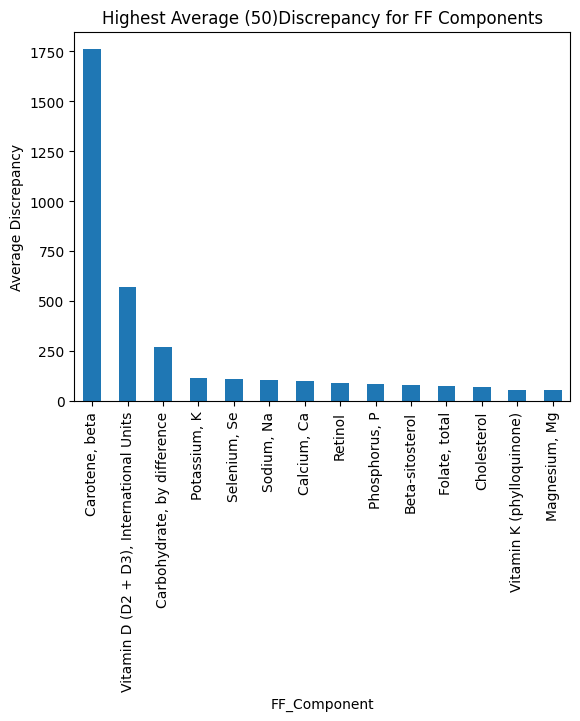

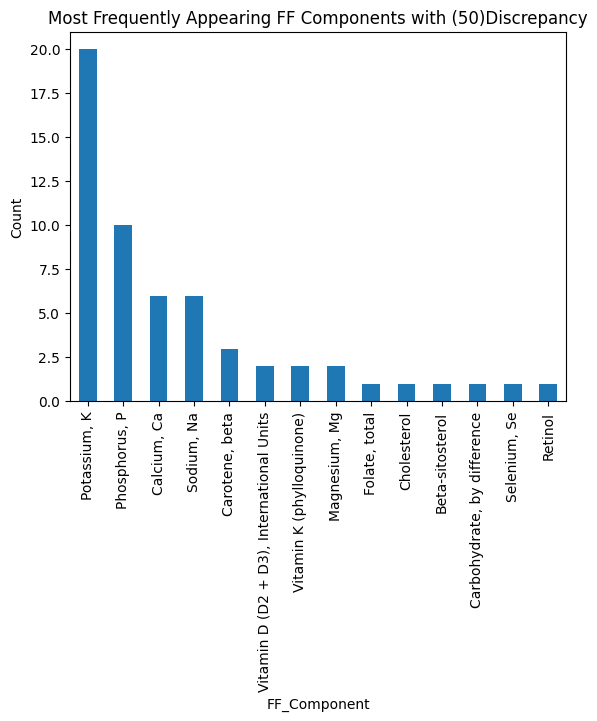

In [30]:
component_counts = {}

component_info = {}

# Loop through each unique food description
for food_description in food_descriptions:
    # Filter rows for the specific food description
    food_df = df[df['FF Food description'] == food_description]

    # Calculate the absolute difference between SR Mean and FF Mean
    food_df.loc[:, 'Mean_Diff'] = abs(food_df['SR Mean per 100g'] - food_df['FF Mean per 100g'])

    # Filter rows where the difference is greater than 50
    filtered_df = food_df[food_df['Mean_Diff'] > 50]

    # Count the occurrences of each FF_Component
    component_counts_for_food = filtered_df['FF_Component'].value_counts()

    component_avg_diff = filtered_df.groupby('FF_Component')['Mean_Diff'].mean()

    for component, avg_diff in component_avg_diff.items():
        if component in component_info:
            component_info[component].append(avg_diff)
        else:
            component_info[component] = [avg_diff]


    # Update the overall dictionary with the counts
    for component, count in component_counts_for_food.items():
        if component in component_counts:
            component_counts[component] += count
        else:
            component_counts[component] = count
component_avg_info = {component: sum(avgs) / len(avgs) for component, avgs in component_info.items()}

# Convert the dictionary to a DataFrame for plotting
avg_diff_df = pd.DataFrame(list(component_avg_info.items()), columns=['FF_Component', 'Average_Discrepancy'])

# Sort the DataFrame by average discrepancy in descending order
avg_diff_df = avg_diff_df.sort_values(by='Average_Discrepancy', ascending=False)

# Plot a bar graph of FF_Component average discrepancies
avg_diff_df.plot(kind='bar', x='FF_Component', y='Average_Discrepancy', legend=False)
plt.title('Highest Average (50)Discrepancy for FF Components')
plt.xlabel('FF_Component')
plt.ylabel('Average Discrepancy')
plt.show()

# Convert the dictionary to a DataFrame for plotting
counts_df = pd.DataFrame(list(component_counts.items()), columns=['FF_Component', 'Count'])

# Sort the DataFrame by count in descending order
counts_df = counts_df.sort_values(by='Count', ascending=False)

# Plot a bar graph of FF_Component counts
counts_df.plot(kind='bar', x='FF_Component', y='Count', legend=False)
plt.title('Most Frequently Appearing FF Components with (50)Discrepancy')
plt.xlabel('FF_Component')
plt.ylabel('Count')
plt.show()

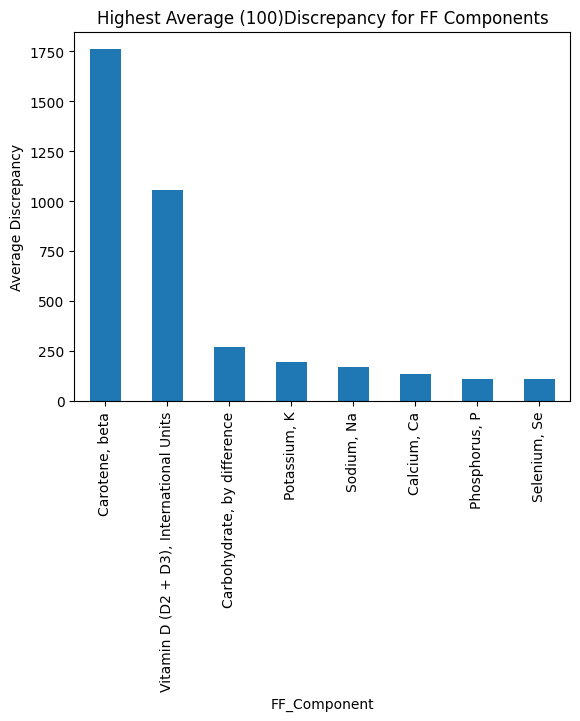

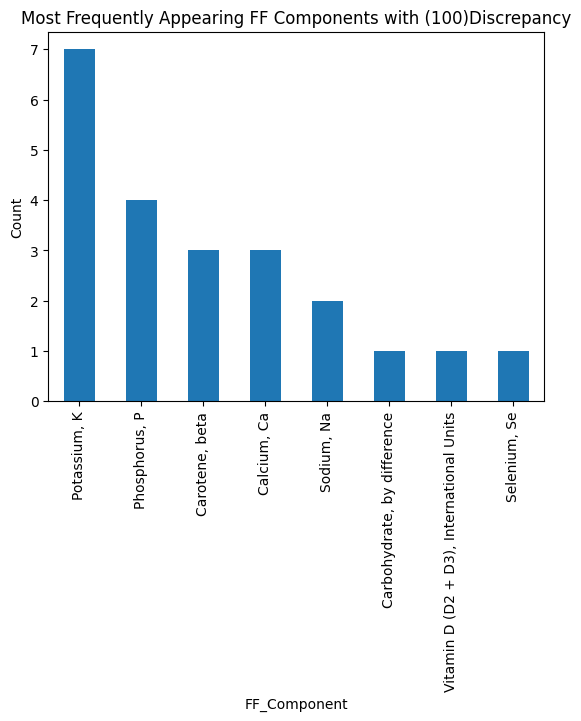

In [31]:
component_counts = {}

component_info = {}

# Loop through each unique food description
for food_description in food_descriptions:
    # Filter rows for the specific food description
    food_df = df[df['FF Food description'] == food_description]

    # Calculate the absolute difference between SR Mean and FF Mean
    food_df.loc[:, 'Mean_Diff'] = abs(food_df['SR Mean per 100g'] - food_df['FF Mean per 100g'])

    # Filter rows where the difference is greater than 100
    filtered_df = food_df[food_df['Mean_Diff'] > 100]

    # Count the occurrences of each FF_Component
    component_counts_for_food = filtered_df['FF_Component'].value_counts()

    component_avg_diff = filtered_df.groupby('FF_Component')['Mean_Diff'].mean()

    for component, avg_diff in component_avg_diff.items():
        if component in component_info:
            component_info[component].append(avg_diff)
        else:
            component_info[component] = [avg_diff]


    # Update the overall dictionary with the counts
    for component, count in component_counts_for_food.items():
        if component in component_counts:
            component_counts[component] += count
        else:
            component_counts[component] = count
component_avg_info = {component: sum(avgs) / len(avgs) for component, avgs in component_info.items()}

# Convert the dictionary to a DataFrame for plotting
avg_diff_df = pd.DataFrame(list(component_avg_info.items()), columns=['FF_Component', 'Average_Discrepancy'])

# Sort the DataFrame by average discrepancy in descending order
avg_diff_df = avg_diff_df.sort_values(by='Average_Discrepancy', ascending=False)

# Plot a bar graph of FF_Component average discrepancies
avg_diff_df.plot(kind='bar', x='FF_Component', y='Average_Discrepancy', legend=False)
plt.title('Highest Average (100)Discrepancy for FF Components')
plt.xlabel('FF_Component')
plt.ylabel('Average Discrepancy')
plt.show()

# Convert the dictionary to a DataFrame for plotting
counts_df = pd.DataFrame(list(component_counts.items()), columns=['FF_Component', 'Count'])

# Sort the DataFrame by count in descending order
counts_df = counts_df.sort_values(by='Count', ascending=False)

# Plot a bar graph of FF_Component counts
counts_df.plot(kind='bar', x='FF_Component', y='Count', legend=False)
plt.title('Most Frequently Appearing FF Components with (100)Discrepancy')
plt.xlabel('FF_Component')
plt.ylabel('Count')
plt.show()

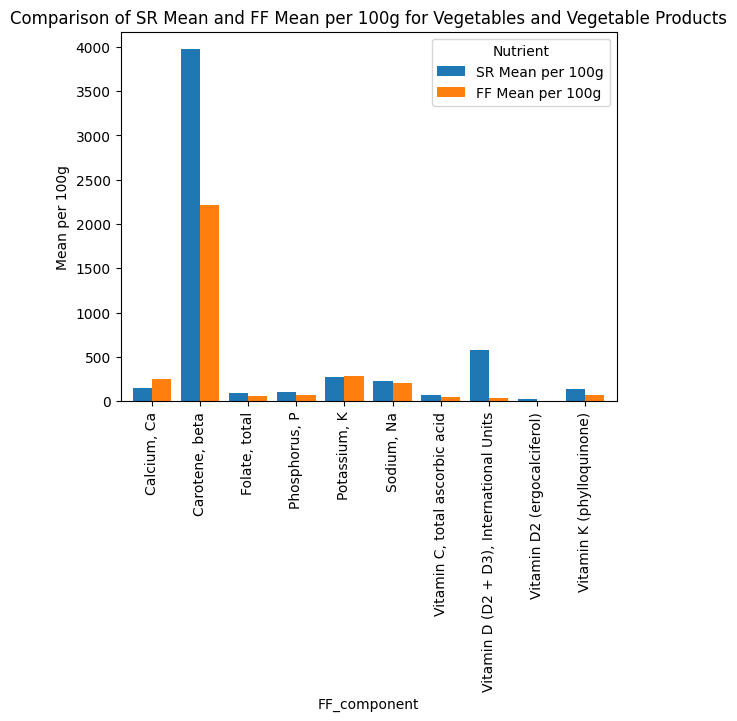

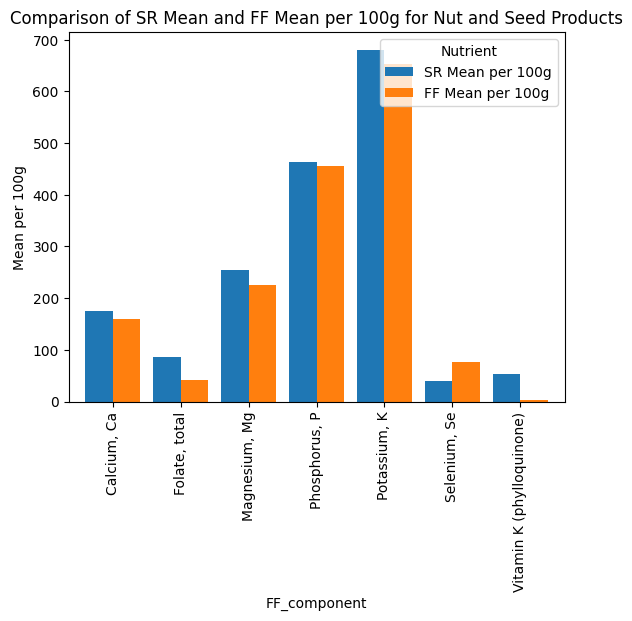

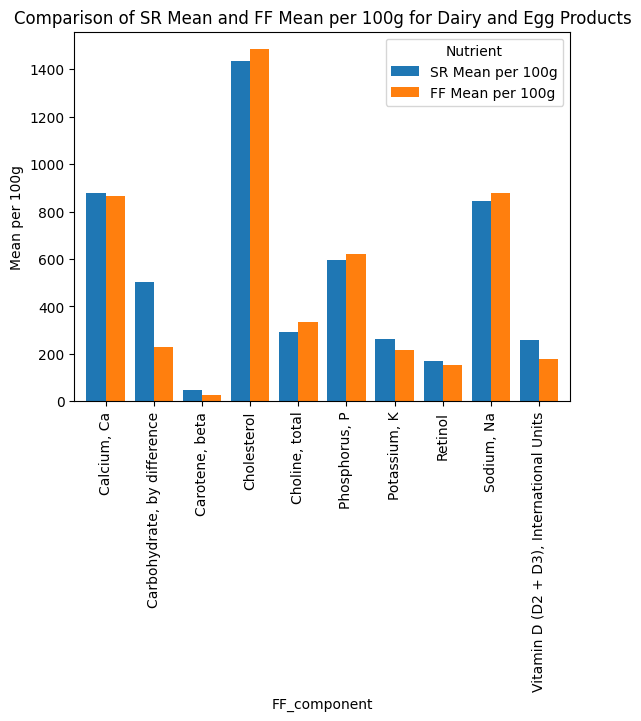

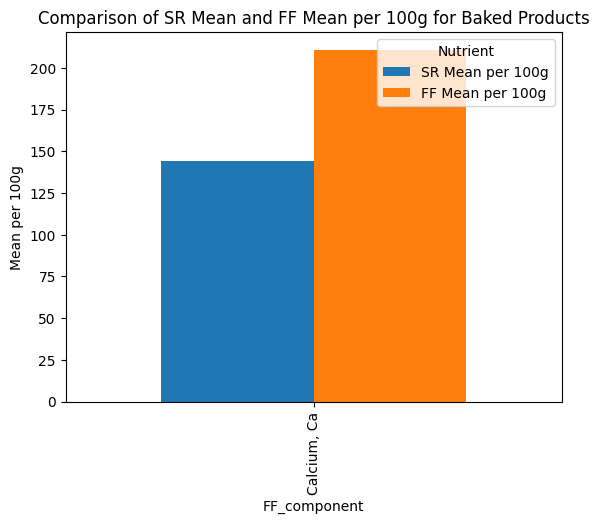

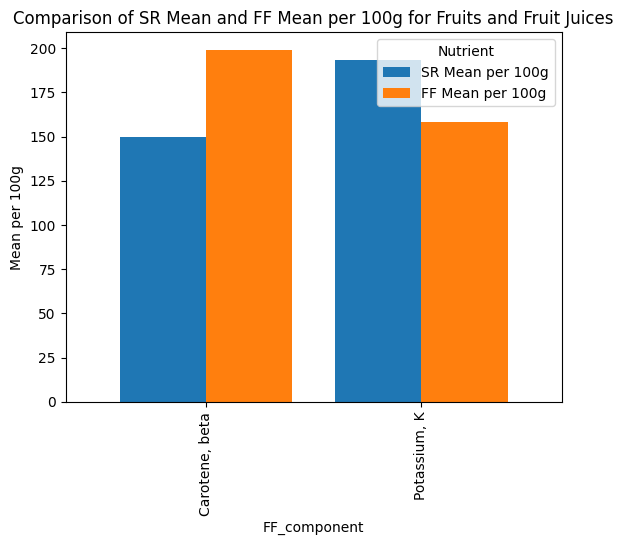

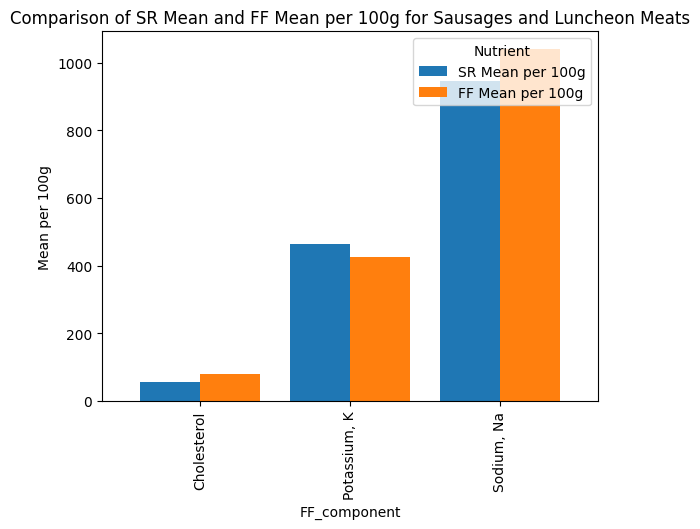

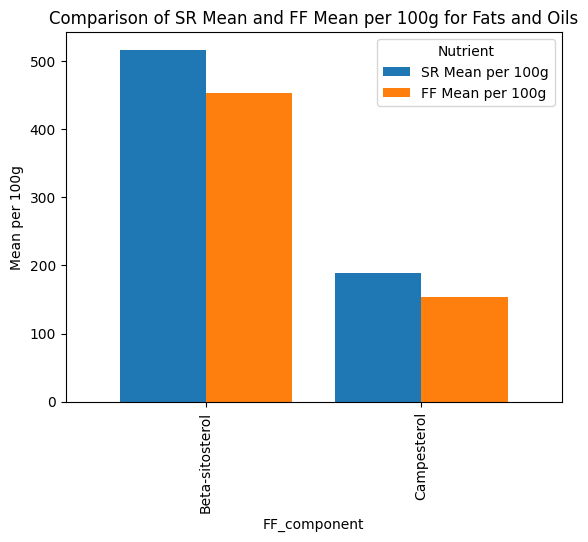

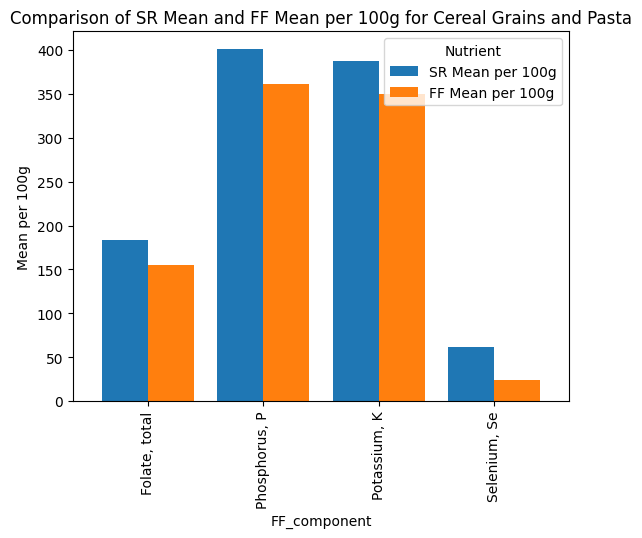

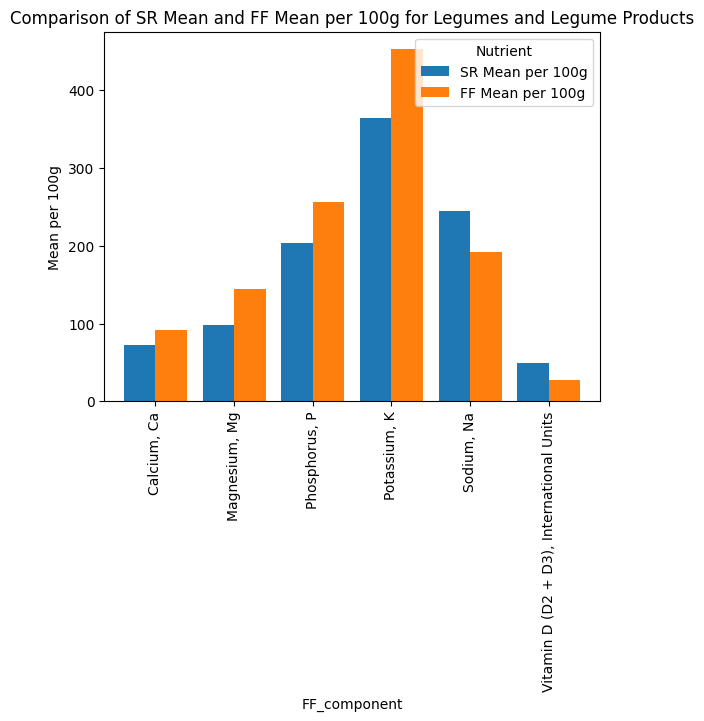

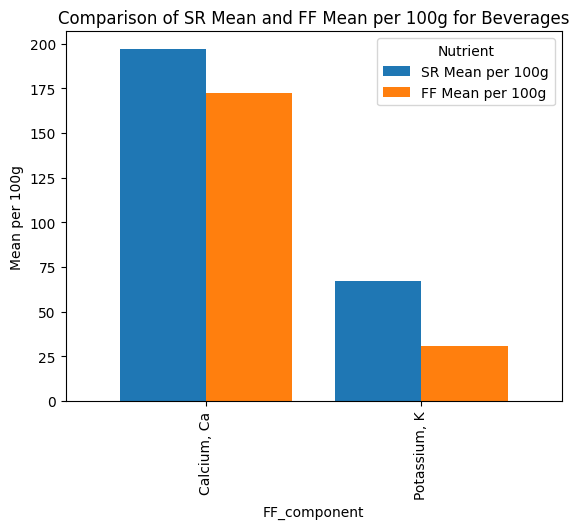

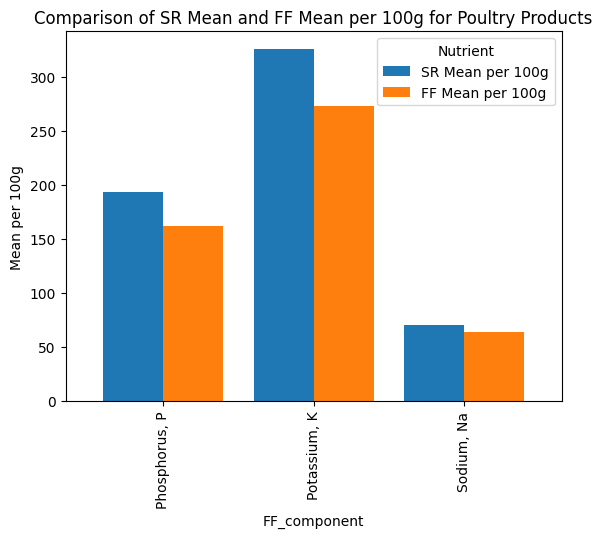

In [44]:
df = pd.read_csv("CLEANED_by_Food.csv")

food_category_ids = df['food_category_id'].unique()

# Iterate through each unique "food_category_id"
for food_category_id in food_category_ids:
    # Filter rows for the specific "food_category_id"
    category_df = df[df['food_category_id'] == food_category_id]

    # Calculate the absolute difference between SR Mean and FF Mean
    category_df['Mean_Diff'] = abs(category_df['SR Mean per 100g'] - category_df['FF Mean per 100g'])

    # Filter rows where the difference is greater than 20
    filtered_df = category_df[category_df['Mean_Diff'] > 20]

    if not filtered_df.empty:
        # Group by "FF_component" and calculate the mean for the filtered data
        grouped_df = filtered_df.groupby('FF_Component')[['SR Mean per 100g', 'FF Mean per 100g']].mean().reset_index()

        # Plot a bar graph for the current "food_category_id"
        grouped_df.plot(kind='bar', x='FF_Component', y=['SR Mean per 100g', 'FF Mean per 100g'], width=0.8)
        plt.title(f'Comparison of SR Mean and FF Mean per 100g for {food_category_id}')
        plt.xlabel('FF_component')
        plt.ylabel('Mean per 100g')
        plt.legend(title='Nutrient', loc='upper right')
        plt.show()